In [ ]:
import numpy as np
from sklearn.utils import resample


original_sample = np.random.normal(loc=10, scale=10, size =10)

bootstrap_means = []

for _ in range(10000):
  bootstrap_sample = resample(original_sample)
  bootstrap_mean = np.mean(bootstrap_sample)
  bootstrap_means.append(bootstrap_mean)


lower_bound = np.percentile(bootstrap_means, 7)
upper_bound = np.percentile(bootstrap_means, 93)

print(f"95% confidence interval: ({lower_bound}, {upper_bound})")
print(np.mean(bootstrap_means))


95% confidence interval: (3.9491827904154486, 14.997268801165905)
9.672119341470662


In [ ]:
import numpy as np
from scipy.stats import mannwhitneyu
from sklearn.utils import resample

# Group data
group_A = np.array([30, 45, 50, 60, 70, 80])
group_B = np.array([35, 40, 55, 65, 75, 85])

# Mann-Whitney U Test
u_statistic, p_value = mannwhitneyu(group_A, group_B)
print(f"Mann-Whitney U Test: U={u_statistic}, p-value={p_value}")

# Bootstrap for confidence interval of median difference
n_bootstrap = 10000
bootstrap_differences = []

for _ in range(n_bootstrap):
    sample_A = resample(group_A)
    sample_B = resample(group_B)
    median_diff = np.median(sample_B) - np.median(sample_A)
    bootstrap_differences.append(median_diff)

# Confidence interval
confidence_level = 95
lower_bound = np.percentile(bootstrap_differences, (100 - confidence_level) / 2)
upper_bound = np.percentile(bootstrap_differences, 100 - (100 - confidence_level) / 2)

print(f"{confidence_level}% Confidence Interval for Median Difference: [{lower_bound:.2f}, {upper_bound:.2f}]")


Mann-Whitney U Test: U=16.0, p-value=0.8181818181818182
95% Confidence Interval for Median Difference: [-25.00, 30.00]


In [ ]:
import pandas as pd

# Create the dataset
data = {
    'user_id': range(1, 13),
    'button_color': ['red', 'blue', 'green', 'red', 'blue', 'green', 'red', 'blue', 'green', 'red', 'blue', 'green'],
    'header_version': ['v1', 'v2', 'v1', 'v2', 'v1', 'v2', 'v1', 'v2', 'v1', 'v2', 'v1', 'v2'],
    'converted': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('mvt_data.csv', index=False)
print("Data saved as 'mvt_data.csv'")


Data saved as 'mvt_data.csv'


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load data
df = pd.read_csv('mvt_data.csv')

# Convert categorical variables to dummy variables
df_dummies = pd.get_dummies(df[['button_color', 'header_version']], drop_first=True)
df_dummies['converted'] = df['converted']  # Ensure 'converted' is included as a numeric column

# Separate predictors (X) and target (y)
X = df_dummies.drop('converted', axis=1).astype(float)  # Ensure predictors are numeric
y = df_dummies['converted'].astype(float)              # Ensure target is numeric

# Add constant term for the intercept
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Print the summary of the model
print(result.summary())


         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:                   12
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            3
Date:                Wed, 25 Dec 2024   Pseudo R-squ.:                   1.000
Time:                        09:21:12   Log-Likelihood:            -1.5777e-09
converged:                      False   LL-Null:                       -8.3178
Covariance Type:            nonrobust   LLR p-value:                 0.0008398
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -22.0403   4.32e+04     -0.001      1.000   -8.47e+04    8.46e+04
button_color_green   -12.9080   1.58e+07 

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packa

#Bayes A/B test
### **What is the Beta Distribution?**

The **Beta distribution** is used to represent probabilities. For A/B testing, it models the likelihood of different conversion rates based on observed data.

#### **Why the Beta Distribution?**
1. **Probabilities Range from 0 to 1**:
   - Conversion rates (e.g., 5%, 10%) are probabilities, and the Beta distribution is defined only between 0 and 1.

2. **Shape Depends on Parameters**:
   - The Beta distribution is controlled by two parameters:
     - **`α` (alpha)**: Represents the number of "successes" (e.g., conversions).
     - **`β` (beta)**: Represents the number of "failures" (e.g., non-conversions).

3. **What Does It Do?**
   - It provides a probability distribution for the conversion rate, showing which values are most likely based on the observed data.

---

### **Real-Life Analogy**

Imagine you’re flipping a coin to determine if it’s biased:
- **Before flipping**:
  - You might believe the coin is fair, so every probability (50%, 60%, etc.) is equally likely (this is the **prior belief**: Beta(1, 1)).
- **After flipping**:
  - If you flip the coin 10 times and it lands heads 7 times, you’ll update your belief. You’ll now think the probability of heads is higher than 50%.
  - The Beta distribution updates based on successes (heads) and failures (tails).

For A/B testing:
- Successes = Conversions (people who buy).
- Failures = Non-conversions (people who don’t buy).

---

### **Function Walkthrough**

Here’s the function again with a detailed explanation.

```python
def bayesian_ab_test(conversions_a, conversions_b, prior_alpha=1, prior_beta=1):
    """Perform Bayesian A/B testing with Beta distributions."""
```

1. **What does this function do?**
   - It takes conversion data for two groups (A and B) and uses the Beta distribution to calculate:
     - The **posterior belief** about the conversion rate for A and B.
     - The **probability** that B is better than A.

2. **Inputs (Parameters):**
   - `conversions_a`: Array of successes (1s) and failures (0s) for Variant A.
   - `conversions_b`: Array of successes and failures for Variant B.
   - `prior_alpha=1`, `prior_beta=1`: The prior belief about successes and failures before observing data.

---

```python
    n_a = len(conversions_a)  # Number of visitors for A
    n_b = len(conversions_b)  # Number of visitors for B
    conv_a = conversions_a.sum()  # Total successes for A
    conv_b = conversions_b.sum()  # Total successes for B
```

1. **`n_a = len(conversions_a)`**:
   - Counts the number of visitors exposed to Variant A.
   - Example: If 1,000 visitors saw Variant A, `n_a = 1000`.

2. **`n_b = len(conversions_b)`**:
   - Counts visitors exposed to Variant B.

3. **`conv_a = conversions_a.sum()`**:
   - Counts how many visitors converted in Variant A (sum of all 1s in the array).
   - Example: If 50 people converted, `conv_a = 50`.

4. **`conv_b = conversions_b.sum()`**:
   - Counts conversions for Variant B.

---

```python
    # Posterior distributions
    posterior_a = beta(prior_alpha + conv_a, prior_beta + n_a - conv_a)
    posterior_b = beta(prior_alpha + conv_b, prior_beta + n_b - conv_b)
```

### **What Does This Do?**

1. **Posterior Distribution**:
   - Updates our prior belief using the observed data to calculate the **posterior distribution** for the conversion rates of A and B.

2. **Parameters for `beta`**:
   - `prior_alpha + conv_a`: Total "successes" (prior successes + observed successes).
   - `prior_beta + n_a - conv_a`: Total "failures" (prior failures + observed failures).

#### **Example for Variant A**:
- **Before Observing Data**:
  - `prior_alpha = 1` (starting belief: 1 success).
  - `prior_beta = 1` (starting belief: 1 failure).

- **Observed Data**:
  - `conv_a = 50` (50 people converted).
  - `n_a - conv_a = 950` (950 people didn’t convert).

- **Posterior Parameters**:
  - `posterior_a = Beta(1 + 50, 1 + 950) = Beta(51, 951)`.
  - This means the posterior distribution now reflects 51 successes and 951 failures.

---

```python
    # Probability that B is better than A
    prob_b_better = (posterior_b.rvs(10000) > posterior_a.rvs(10000)).mean()
```

### **What Does This Do?**

1. **`posterior_b.rvs(10000)`**:
   - Generates 10,000 random samples from B’s posterior distribution. Each sample is a possible conversion rate for B.

2. **`posterior_a.rvs(10000)`**:
   - Generates 10,000 random samples from A’s posterior distribution.

3. **`posterior_b.rvs(10000) > posterior_a.rvs(10000)`**:
   - Compares the sampled conversion rates for B and A.
   - Returns `True` (1) if B’s rate is higher than A’s, and `False` (0) otherwise.

4. **`.mean()`**:
   - Takes the average of these comparisons.
   - Example: If B is better than A in 7,800 out of 10,000 samples, the result is `0.78` (78%).

---

```python
    return posterior_a, posterior_b, prob_b_better
```

1. **What is returned?**
   - `posterior_a`: Updated belief about A’s conversion rate.
   - `posterior_b`: Updated belief about B’s conversion rate.
   - `prob_b_better`: Probability that B is better than A.

---

### **Real-Life Scenario**

Let’s say you’re running an A/B test on a website:
- Variant A (control): The current design of your homepage.
- Variant B (treatment): A new design with an updated call-to-action.

#### Observed Data:
- 1,000 visitors saw Variant A:
  - 50 people converted.
- 1,000 visitors saw Variant B:
  - 60 people converted.

#### What the Code Does:
1. **Prior Belief**:
   - You start with no strong assumptions about conversion rates (Beta(1, 1)).

2. **Posterior Distributions**:
   - For A: Beta(51, 951).
   - For B: Beta(61, 941).

3. **Compare Probabilities**:
   - Simulate many possible conversion rates for A and B based on the posteriors.
   - Calculate how often B’s rate is higher than A’s.

#### Result:
- "There’s a 78% probability that the new design (B) performs better than the current design (A)."

---

### **Key Takeaways**
- **Beta Distribution**:
  - Models probabilities based on successes and failures.
  - Parameters:
    - `α`: Successes.
    - `β`: Failures.

- **How It Works**:
  - The function updates your beliefs about conversion rates using observed data.
  - It calculates a clear, intuitive probability that one variant is better than the other.

- **Why It’s Useful**:
  - Bayesian testing gives actionable insights: "How confident should I be that Variant B is better?"
  - It’s especially powerful when you have small samples or want to incorporate prior knowledge.

In [ ]:
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt

# Simulated real-world data
np.random.seed(42)

# Conversion rates for A and B
prob_a = 0.05  # True conversion rate for variant A (Control)
prob_b = 0.06  # True conversion rate for variant B (Treatment)

# Generate simulated conversion data
n_visitors = 1000  # Total number of visitors for each variant
conversions_a = np.random.binomial(1, prob_a, n_visitors)  # 1 = success, 0 = failure
conversions_b = np.random.binomial(1, prob_b, n_visitors)


In [ ]:
# Bayesian A/B Testing function
def bayesian_ab_test(conversions_a, conversions_b, prior_alpha=1, prior_beta=1):
    """Perform Bayesian A/B testing with Beta distributions."""
    n_a = len(conversions_a)  # Number of visitors for A
    n_b = len(conversions_b)  # Number of visitors for B
    conv_a = conversions_a.sum()  # Total successes for A
    conv_b = conversions_b.sum()  # Total successes for B

    # Posterior distributions
    posterior_a = beta(prior_alpha + conv_a, prior_beta + n_a - conv_a)
    posterior_b = beta(prior_alpha + conv_b, prior_beta + n_b - conv_b)

    # Probability that B is better than A
    prob_b_better = (posterior_b.rvs(10000) > posterior_a.rvs(10000)).mean()

    return posterior_a, posterior_b, prob_b_better


In [ ]:
# Perform Bayesian A/B testing
posterior_a, posterior_b, prob_b_better = bayesian_ab_test(conversions_a, conversions_b)

# Print results
print(f"Probability that variant B is better than variant A: {prob_b_better:.2f}")


Probability that variant B is better than variant A: 0.98


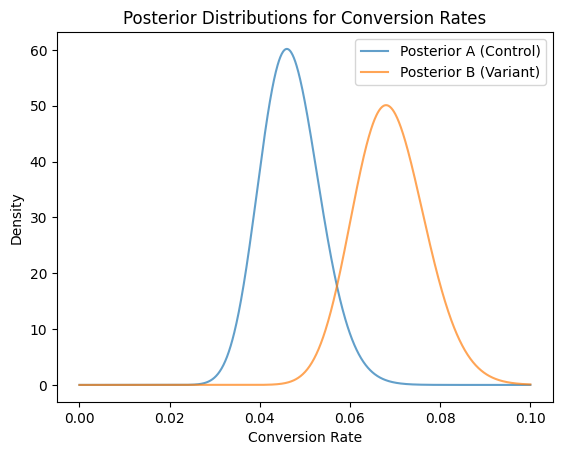

In [ ]:
# Plot posterior distributions
x = np.linspace(0, 0.1, 1000)  # Range of conversion rates for plotting
plt.plot(x, posterior_a.pdf(x), label='Posterior A (Control)', alpha=0.7)
plt.plot(x, posterior_b.pdf(x), label='Posterior B (Variant)', alpha=0.7)
plt.title("Posterior Distributions for Conversion Rates")
plt.xlabel("Conversion Rate")
plt.ylabel("Density")
plt.legend()
plt.show()
